#Libraries and data

In [ ]:
!pip install shap

     |████████████████████████████████| 358kB 13.0MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491625 sha256=99edb290bdd755a8c8f01576424f5a8a91e2e2ba9da0be1c281c2e229d2474ae
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
%cd /content/drive/MyDrive/Data Mining for Business in Python/9. XGBoost & SHAP

/content/drive/MyDrive/Data Mining for Business in Python 2021/9. XGBoost & SHAP


In [ ]:
#import libraries
import pandas as pd
import xgboost as xgb

In [ ]:
#Get the data
data = pd.read_csv("car_prices.csv")
data.head()

,Unnamed: 0,Price,Mileage,Cylinder,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevy,Pontiac,Saab,Saturn,convertible,coupe,hatchback,sedan,wagon
0,1,22661.05,20105,6,4,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1,2,21725.01,13457,6,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,3,29142.71,31655,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0
3,4,30731.94,22479,4,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,5,33358.77,17590,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0


In [ ]:
#remove unwanted variable
data = data.iloc[:,1:]
data.head()

,Price,Mileage,Cylinder,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevy,Pontiac,Saab,Saturn,convertible,coupe,hatchback,sedan,wagon
0,22661.05,20105,6,4,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1,21725.01,13457,6,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,29142.71,31655,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0
3,30731.94,22479,4,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,33358.77,17590,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0


#Data Prep

In [ ]:
#isolate X and y
y = data.Price
X = data.iloc[:, 1:]

In [ ]:
#Create Train and Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)
X_test.head()

,Mileage,Cylinder,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevy,Pontiac,Saab,Saturn,convertible,coupe,hatchback,sedan,wagon
524,22891,6,4,1,1,1,0,0,0,1,0,0,0,0,0,1,0
344,7278,4,4,0,0,0,0,0,1,0,0,0,0,0,0,1,0
45,9795,4,4,1,1,1,0,0,0,0,1,0,0,0,0,1,0
144,14095,8,4,1,0,1,0,1,0,0,0,0,0,0,0,1,0
507,32458,4,4,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
#Create XGBoost matrices
Train = xgb.DMatrix(X_train, label = y_train)
Test = xgb.DMatrix(X_test, label = y_test)

#XGBoost

In [ ]:
#Parameters
parameters = {'learning_rate': 0.3,
              'max_depth': 6,
              'colsample_bytree': 1,
              'subsample': 1,
              'min_child_weight': 1,
              'gamma': 0,
              'random_state': 1502,
              'eval_metric': "rmse",
              'objective': "reg:squarederror"}

In [ ]:
#XGBoost model
model = xgb.train(params = parameters,
                  dtrain = Train,
                  num_boost_round  = 15,
                  evals = [(Test, "Price")],
                  verbose_eval = 2)

[0]	Price-rmse:15669.2
[2]	Price-rmse:8322.17
[4]	Price-rmse:4662.32
[6]	Price-rmse:3132.78
[8]	Price-rmse:2565.49
[10]	Price-rmse:2437.9
[12]	Price-rmse:2379.03
[14]	Price-rmse:2363.41


#Model Assessment

In [ ]:
#Predictions
predictions = model.predict(Test)
predictions[:5]

array([18337.92 , 13038.506, 30142.674, 41111.992, 11066.108],
      dtype=float32)

In [ ]:
#Model assessment
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
print(round(mean_absolute_error(y_test, predictions),0))
print(round(mean_squared_error(y_test, predictions),0))
print(round(np.sqrt(mean_squared_error(y_test, predictions)),0))

1686.0
5585697.0
2363.0


#SHAP

In [ ]:
#Preparation
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

In [ ]:
#local interpretability
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[3,:],X_test.loc[144])

In [ ]:
X_test.head()

,Mileage,Cylinder,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevy,Pontiac,Saab,Saturn,convertible,coupe,hatchback,sedan,wagon
524,22891,6,4,1,1,1,0,0,0,1,0,0,0,0,0,1,0
344,7278,4,4,0,0,0,0,0,1,0,0,0,0,0,0,1,0
45,9795,4,4,1,1,1,0,0,0,0,1,0,0,0,0,1,0
144,14095,8,4,1,0,1,0,1,0,0,0,0,0,0,0,1,0
507,32458,4,4,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
shap_values

array([[ -658.48663 ,  1047.0729  ,  -313.295   , ...,    32.945   ,
          -53.55775 ,   -73.04561 ],
       [ 2138.6614  , -4721.1436  ,  -197.68057 , ...,    20.11759 ,
          -43.92941 ,   -52.546806],
       [ 2307.5637  , -2548.11    ,  -377.12265 , ...,    52.53792 ,
         -326.0129  ,   -40.327442],
       ...,
       [ -452.89258 ,   481.52557 ,   886.97546 , ...,   -24.432137,
           27.517256,   -48.560505],
       [ -817.26544 , -3610.4487  ,   751.95483 , ...,    45.167393,
           74.90731 ,   -99.84513 ],
       [ -753.17017 ,  1153.115   ,  -327.14847 , ...,    29.646397,
          -58.847965,   -63.34895 ]], dtype=float32)

In [ ]:
#All local interpretation
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test)

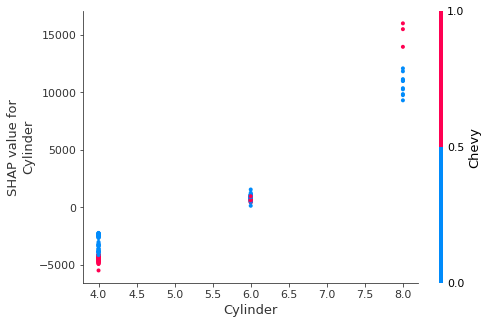

In [ ]:
#Dependency plots
shap.dependence_plot("Cylinder", shap_values, X_test)

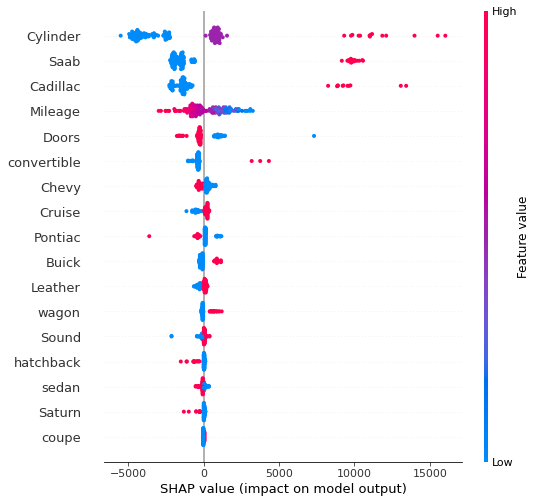

In [ ]:
#Summary plot
shap.summary_plot(shap_values, X_test)